# Bank Client Analysis
**Abstract**:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Background**:A large bank has asked us to evaluate the marketing algorithms they use for retail banking. Their sophisticated phone marketing algorithm predicts whether a certain person will subscribe to a term deposit or not. Based on that assessment, the bank then optimises its phone calling strategy. With this algorithm, the bank has been successful in predicting which clients are more likely to subscribe to their term deposits. Management is now interested in finding out how a classification model can lead to certain decision-making processes.


**Data Set Information**:The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


## Steps: 
**1. EDA**
- Variable Identification
- Missing values treatment
- Univariate Analysis
- Bi-variate Analysis
- Outlier treatment
- Feature Engineering

**2. Modeling**
- Machine Learning (Logistic Regression, KNN, Kernel SVM, Decision Tree, Random Forest, Naive Bayes)
- Dimensionality Reducation(PCA, LDA)

**3. Conclusion**

## Source:
* Dataset from: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
---

# 1. EDA

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1.1 Variable Identification

First, we need to identify Predictor (Input) and Target (output) variables according to the attribute information.

**Attribute Information:** 

* Age (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign**:
* Contact: contact communication type (categorical:'cellular','telephone')
* Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
* Dayofweek: last contact day of the week (categorical:'mon','tue','wed','thu','fri')
* Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes**:
* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* Previous: number of contacts performed before this campaign and for this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')

**Social and economic context attributes**:
* Emp.var.rate: employment variation rate - quarterly indicator(numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric)
* Cons.conf.idx: consumer confidence index - monthly indicator(numeric)
* Euribor3m: euribor 3 month rate - daily indicator (numeric)
* Nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target)**:
* y: has the client subscribed a term deposit? (binary: 'yes', 'no')

Next, let's identify the data type and category of the variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Among the independent variables, we have 10 numerical variables and 10 categorical variables.
numericals = ['age', 'Duration', 'campaign', 'pdays', 'previous', 
              'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
             'euribor3m', 'Nr.employed']
categoricals = ['job', 'marital', 'education', 'default', 'housing', 
                 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
print(len(numericals), len(categoricals))

10 10


## 1.2 Missing Values Treatment

In [5]:
# Take care of missing data
df.isnull().values.any()

False

In [6]:
# Take a look at hidden missing data which is encoded with label 'unknown' in some categorical variables
print("# Missing job: {0}".format(len(df.loc[df['job'] == "unknown"])))
print("# Missing marital: {0}".format(len(df.loc[df['marital'] == "unknown"])))
print("# Missing education: {0}".format(len(df.loc[df['education'] == "unknown"])))
print("# Missing default: {0}".format(len(df.loc[df['default'] == "unknown"])))
print("# Missing housing:: {0}".format(len(df.loc[df['housing'] == "unknown"])))
print("# Missing loan: {0}".format(len(df.loc[df['loan'] == "unknown"])))
print("# Missing contact: {0}".format(len(df.loc[df['contact'] == "unknown"])))
print("# Missing month: {0}".format(len(df.loc[df['month'] == "unknown"])))
print("# Missing day_of_week: {0}".format(len(df.loc[df['day_of_week'] == "unknown"])))
print("# Missing poutcome: {0}".format(len(df.loc[df['poutcome'] == "unknown"])))


# Missing job: 330
# Missing marital: 80
# Missing education: 1731
# Missing default: 8597
# Missing housing:: 990
# Missing loan: 990
# Missing contact: 0
# Missing month: 0
# Missing day_of_week: 0
# Missing poutcome: 0


In [7]:
# Generate descriptive statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# Removing duplicate values
print(df.duplicated().sum()) 
df = df.drop_duplicates()

12


## 1.3 Univariate Analysis 

### 1.3.1 Numerical Variables

- **Important note**: this 'duration' attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- Therefore, we need to drop `duration`.

In [9]:
numericals = list(set(numericals) - set(['duration']))

In [10]:
duration = df['duration']
df.drop(['duration'], axis = 1, inplace = True)

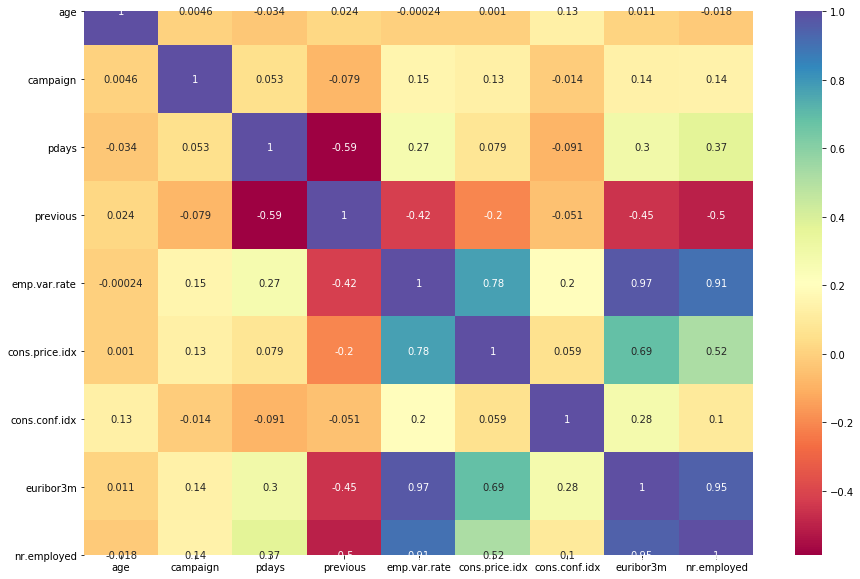

In [11]:
# Take a look at the correlation between numeric variables
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'Spectral')

As shown above, the correlations between these variables should be paid extra attention to.
- 'pdays' (the number of days that passed by after the client was last contacted from a previous campaign) and 'previous' (number of contacts performed before this campaign and for this client).
- 'nr.employed' (number of employees) and 'previous' (number of contacts performed before this campaign and for this client).
- 'emp.var.rate' (employment variation rate) and 'euribor3m' (euribor 3 month rate)

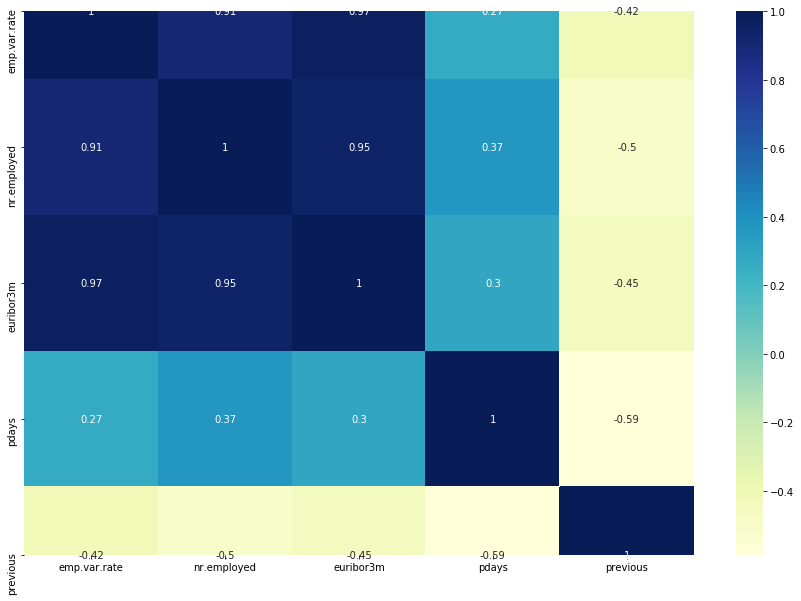

In [12]:
# Let's explore further into these highly correlated variables
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m","pdays","previous"]].corr(), annot=True, cmap='YlGnBu')
plt.show()

Among these highly related variables:
- 'emp.var.rate' and 'euribor3m' have the greatest positive correlation at 0.97.
- 'nr.employed' and 'euribor3m' have the second greatest positive correlation at 0.95.
- 'emp.var.rate' and 'nr.employed' have the third greatest positive correlation at 0.91.

**Note:** Euribor is short for Euro Interbank Offered Rate. The Euribor rates are based on the interest rates at which a panel of European banks borrow funds from one another.

The three-month rate of Euribor plays an important positive role in the employment variation rate and the number of employees in this bank. Here we will drop 'emp.var.rate' and 'nr.employed' to maintain a stable coefficient estimate and avoid overfitting.

In [13]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace = True)

In [14]:
numericals = list(set(numericals) - set(['emp.var.rate', 'Nr.employed']))
print(len(numericals))

8


In [15]:
# Check the multi-collinearity using Variance Inflation Factor (VIF) for each numerical independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create the numerical independent variables set
X_numericals = df[['age', 'campaign', 'pdays', 'previous', 
                   'cons.price.idx', 'cons.conf.idx','euribor3m']]
# VIF dataframe
vif = pd.DataFrame()
vif['features'] = X_numericals.columns
# Calculate VIF for each independent variable
vif['vif_factor'] = [variance_inflation_factor(X_numericals.values, i) for i in range(len(X_numericals.columns))]
vif

,features,vif_factor
0,age,16.040029
1,campaign,1.900156
2,pdays,43.026505
3,previous,1.980501
4,cons.price.idx,160.125883
5,cons.conf.idx,90.493767
6,euribor3m,7.857984


**Note**: Variance Inflation Factor(VIF) is a measure of multicollinearity in the set of multiple regression variables. The higher the value of VIF the higher correlation between this variable and the rest. If the VIF value is higher than 10, it is usually considered to have a high correlation with other independent variables. However, the acceptance range is subject to requirements and constraints.

From the results, we can see that most features are highly correlated with other independent variables and only three features can pass the below 10 threshold.

In [16]:
numericals = list(set(numericals) - set(['Duration']))
print(len(numericals))

7


Euribor3M


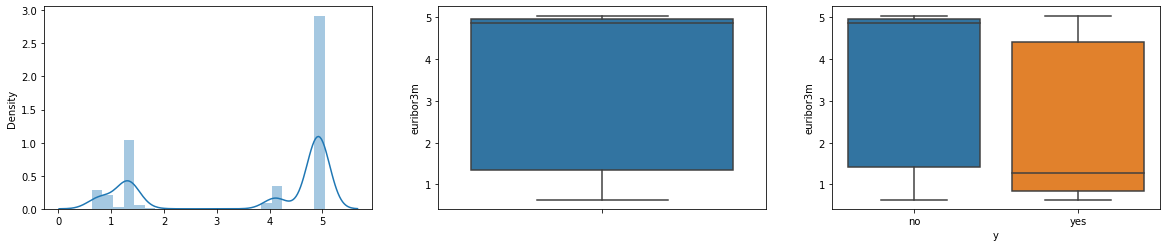

Age


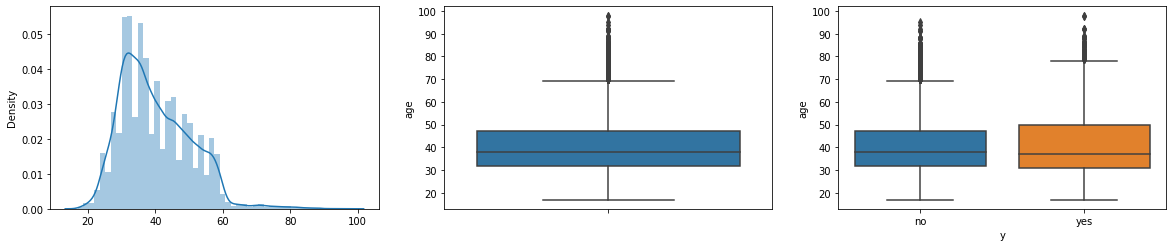

Campaign


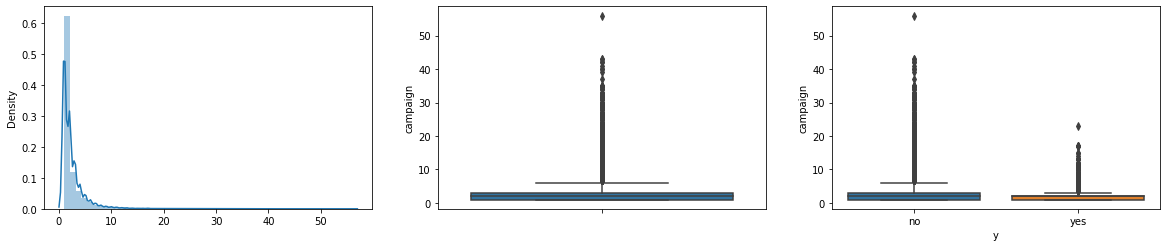

Previous


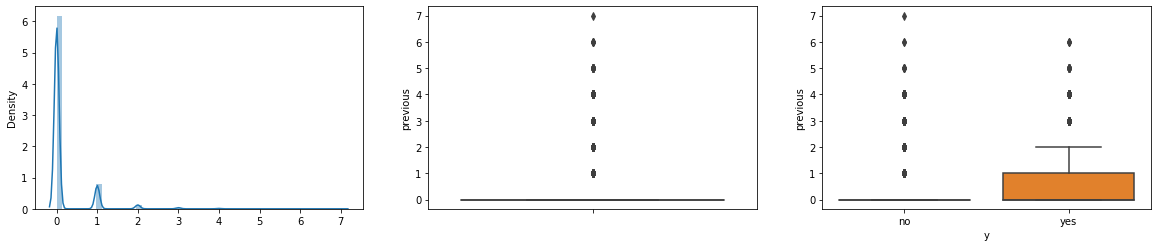

Pdays


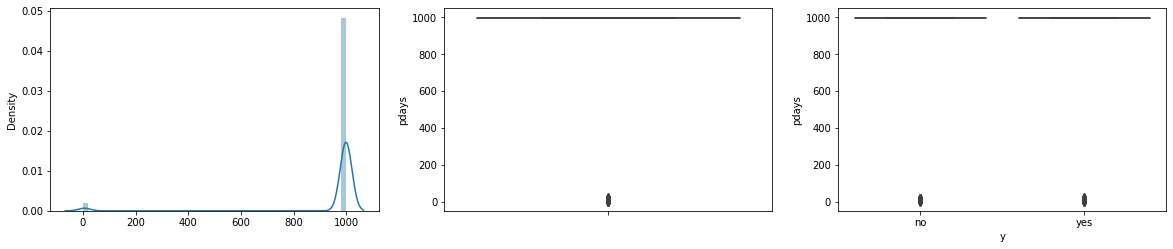

Cons.Price.Idx


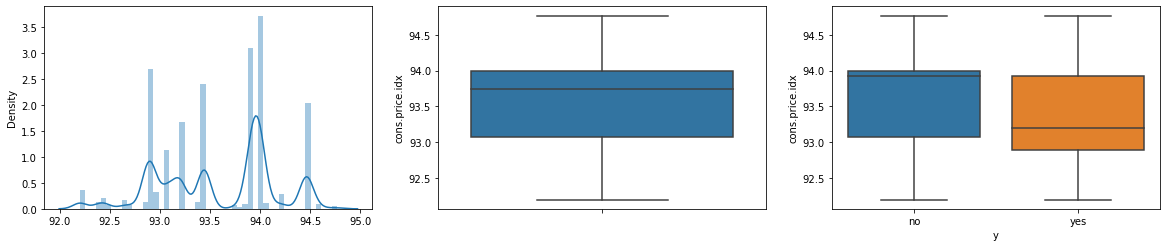

Cons.Conf.Idx


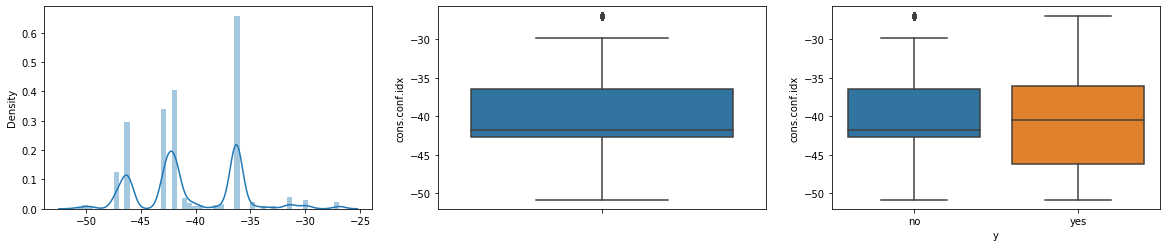

In [17]:
# Visualize numerical variables
i = 1
for column in numericals:
    print(column.title())
    plt.subplots(figsize=(20, 35))
    plt.subplot(len(numericals) + 1, 3, i)
    sns.distplot(x = df[column])
    i += 1
    plt.subplot(len(numericals) + 1, 3, i)
    sns.boxplot(y = df[column])
    i += 1
    plt.subplot(len(numericals) + 1, 3, i)
    sns.boxplot(x = df["y"], y = df[column])
    i += 1
    plt.show()

From the plots above, we can find these insights below:
- **Euribor3M:** the higher the euribor's three-month rate is, the more likely the client wouldn't subscribe a term deposit.

- **Cons.price.idx:** if the consumer confidence index is higher, it's more likely that the client wouldn't subscribe a term deposit.

- **Previous**: Contact is important. If we contact clients in advance, there's a high probability for them to subscribe a term deposit.

### 1.3.2 Categorical Variables

In [18]:
# Recall categorical variables we have
print('categoricals:', categoricals)

categoricals: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


Job


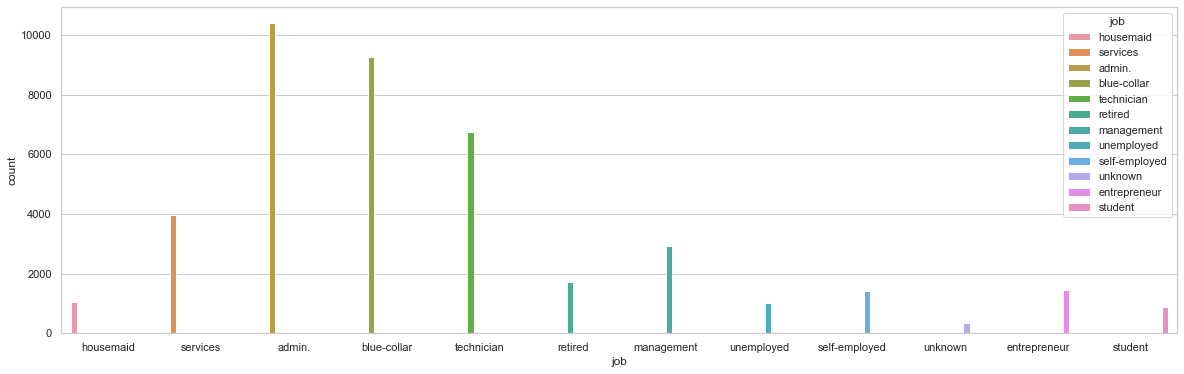

Marital


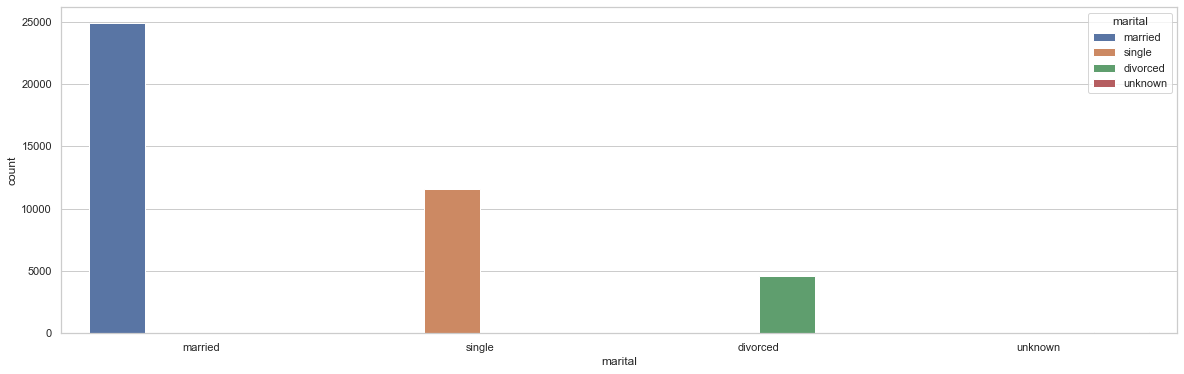

Education


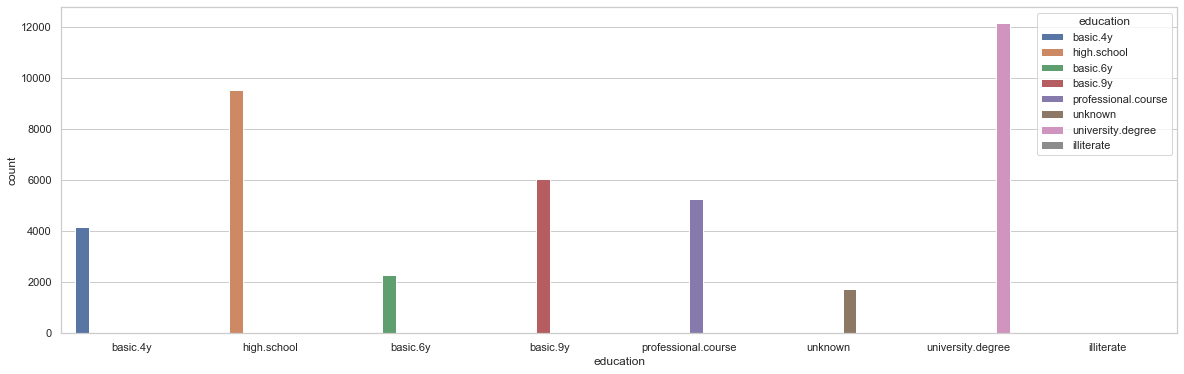

Default


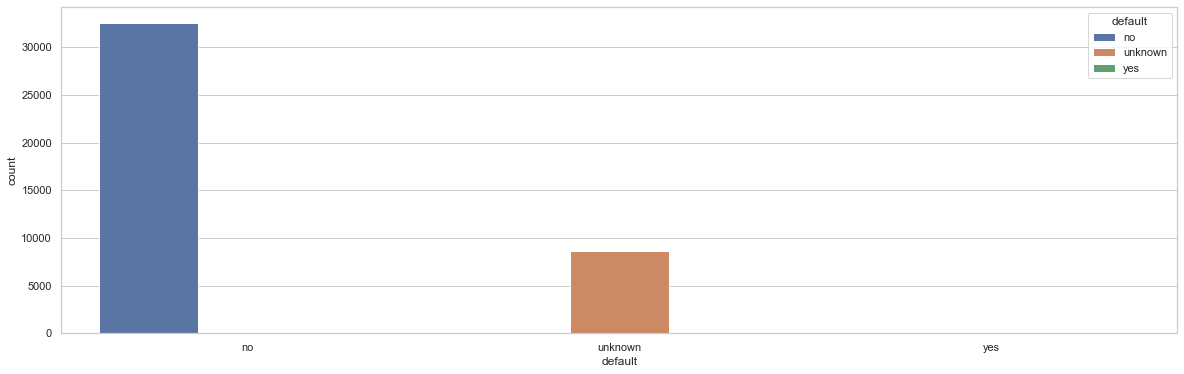

Housing


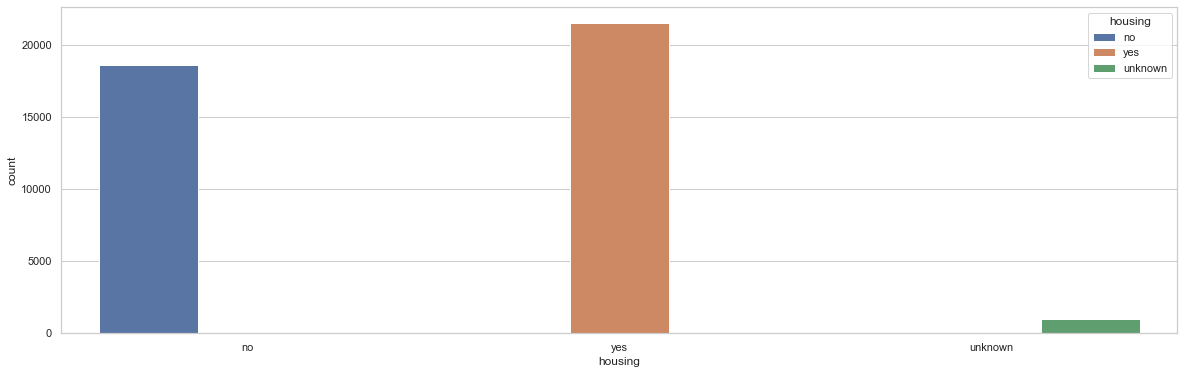

Loan


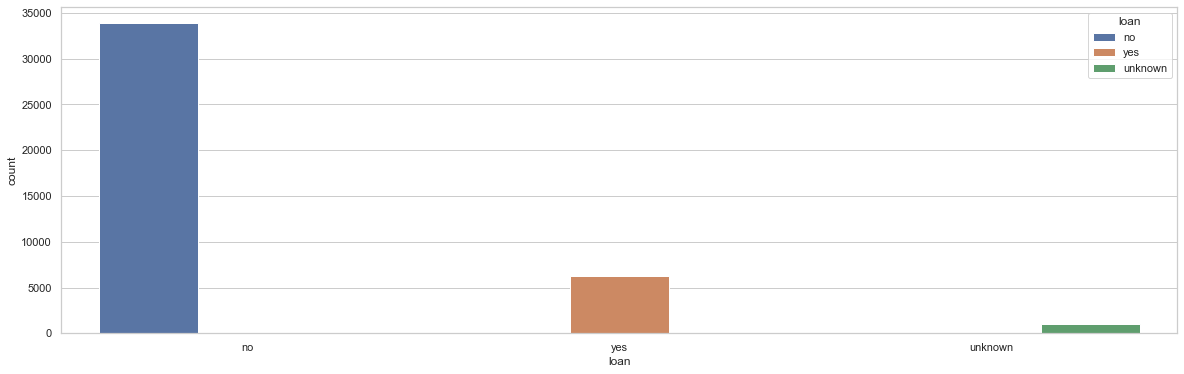

Contact


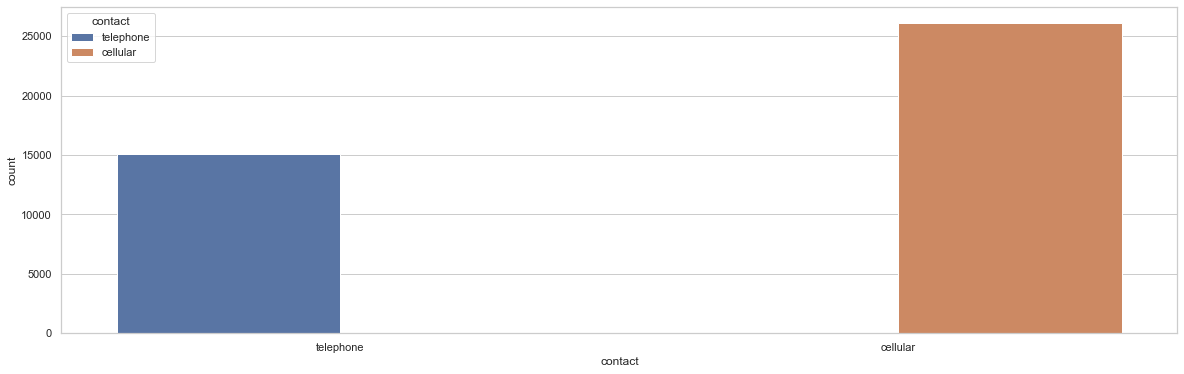

Month


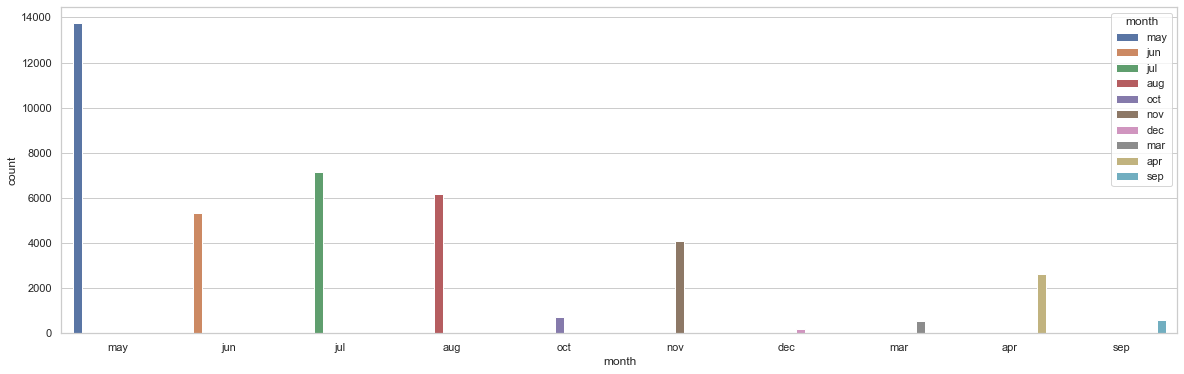

Day_Of_Week


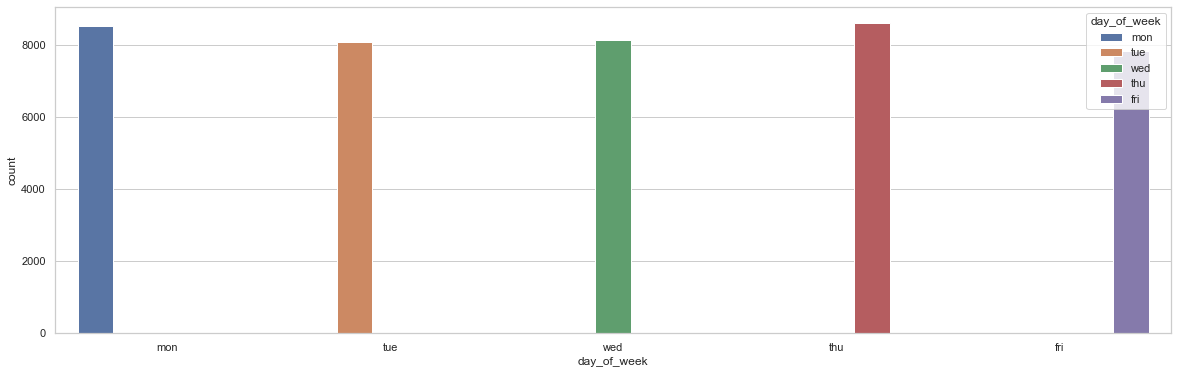

Poutcome


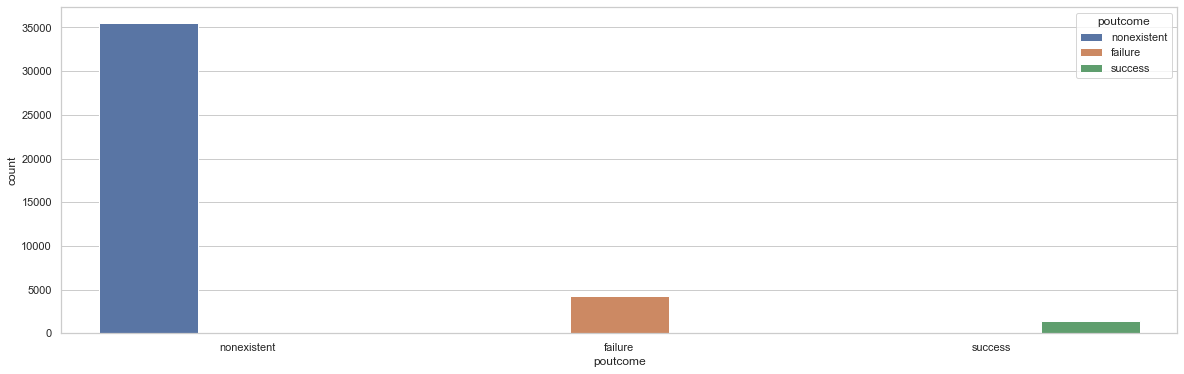

In [19]:
for column in categoricals:
    plt.figure(figsize = (20, 6))
    print(column.title())
    sns.set_theme(style="whitegrid", color_codes=True)
    ax = sns.countplot(x = df[column], hue = df[column])

    plt.show()

Job


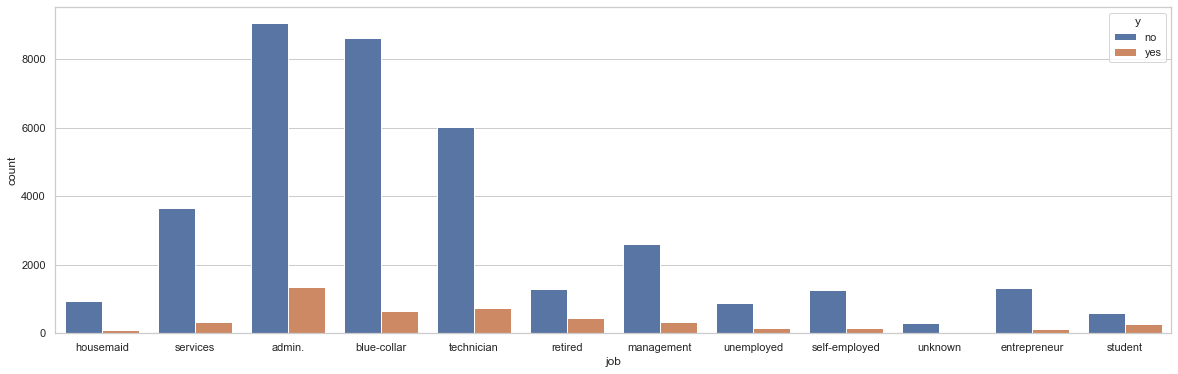

Marital


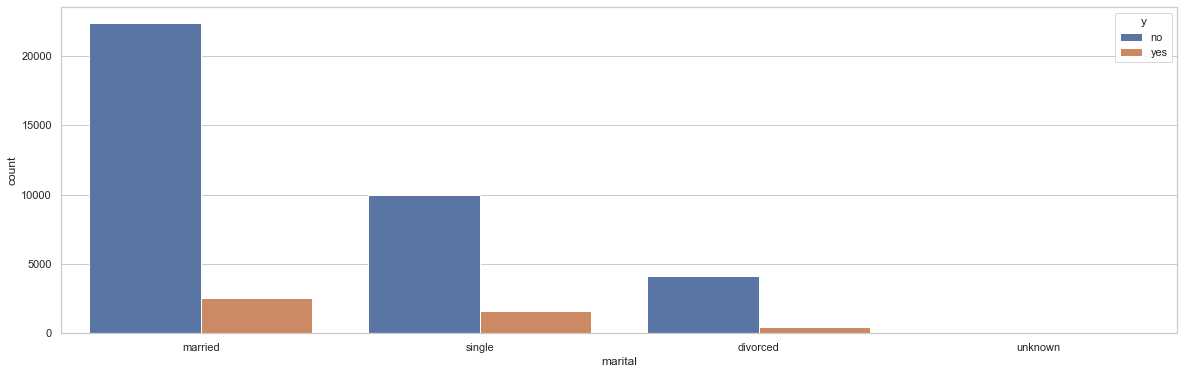

Education


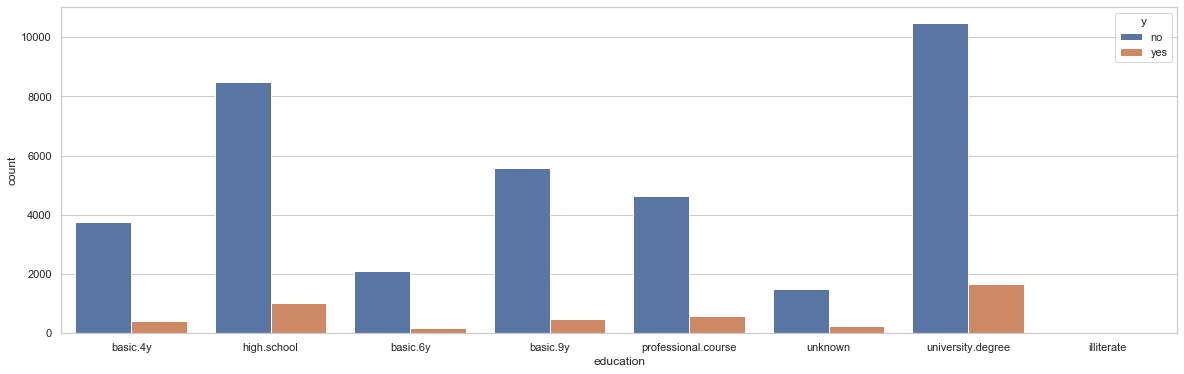

Default


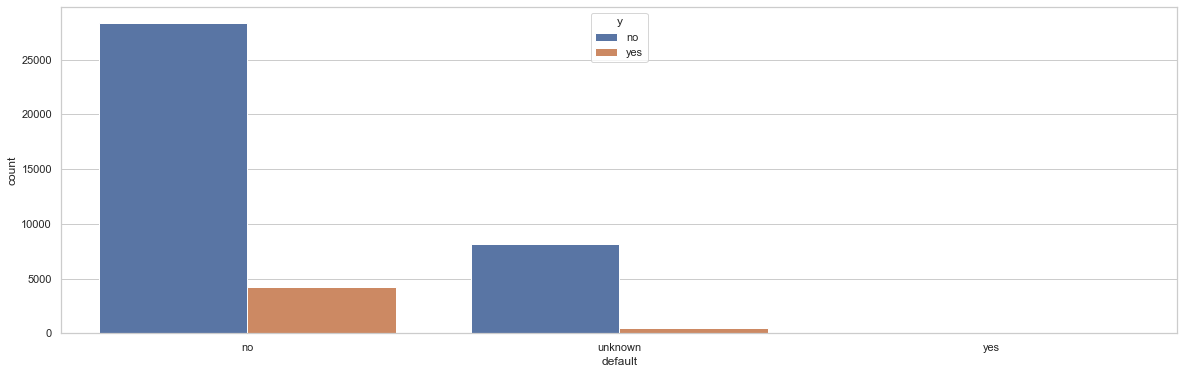

Housing


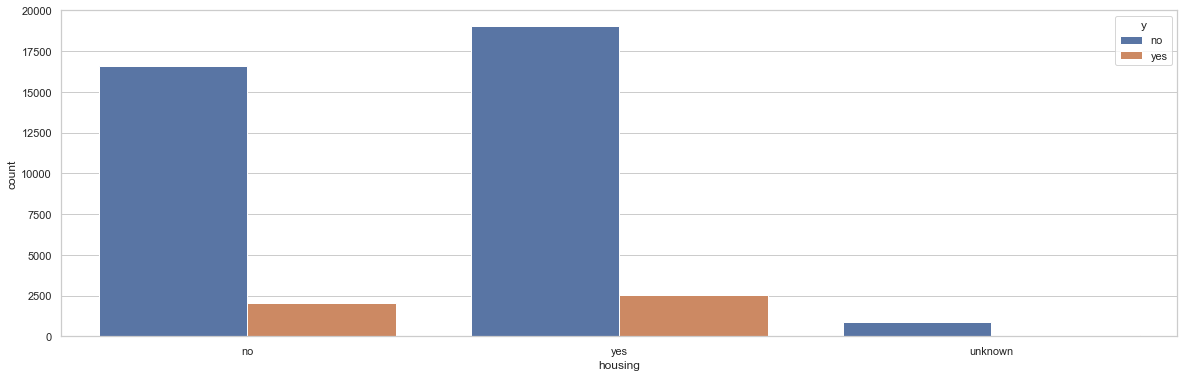

Loan


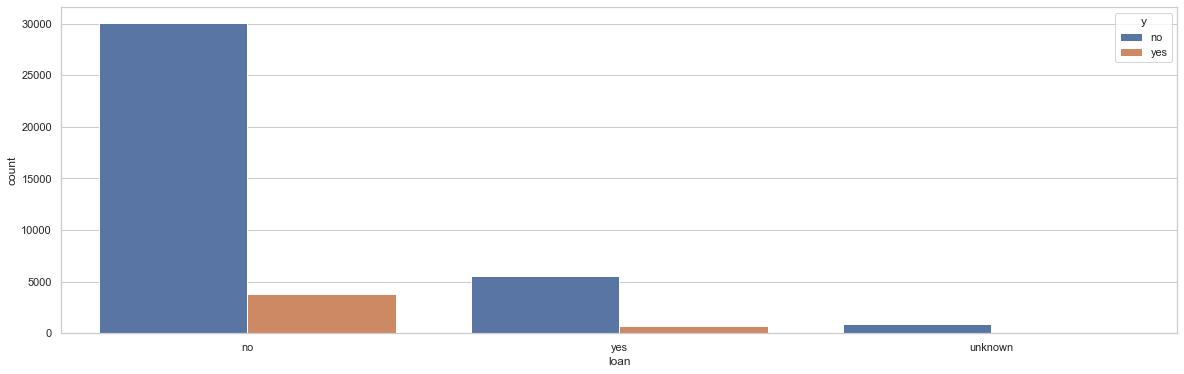

Contact


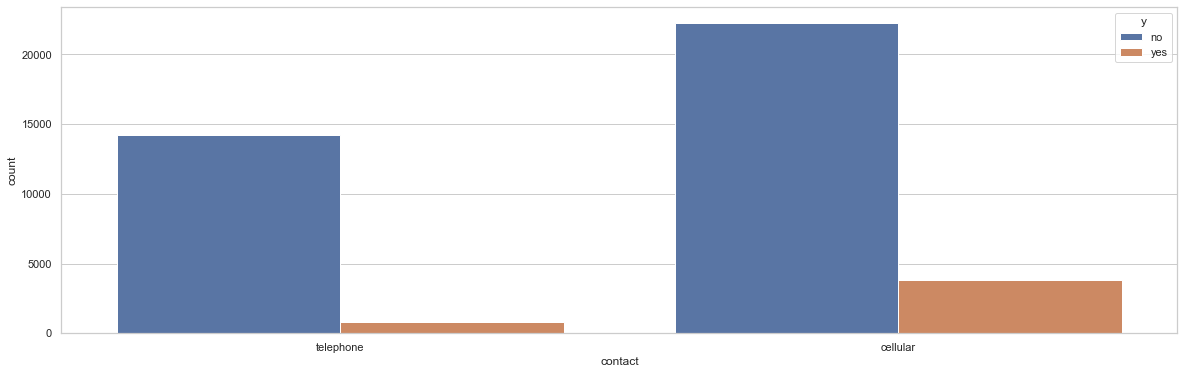

Month


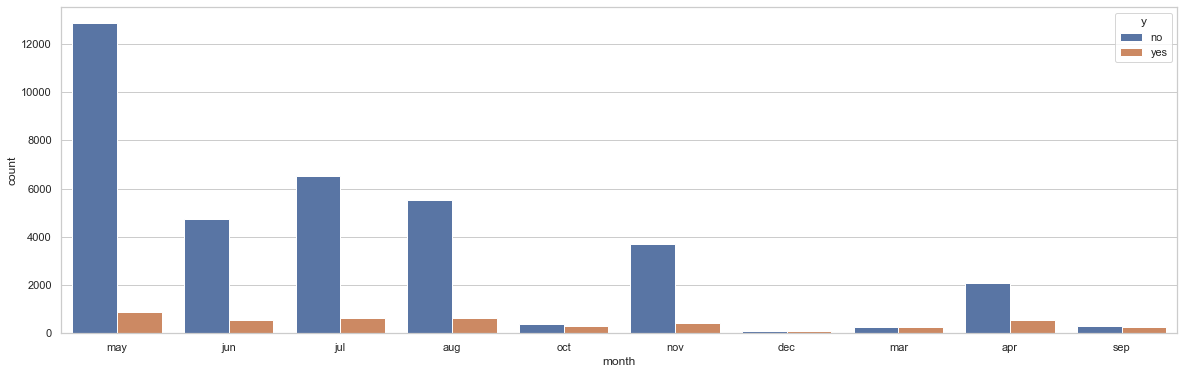

Day_Of_Week


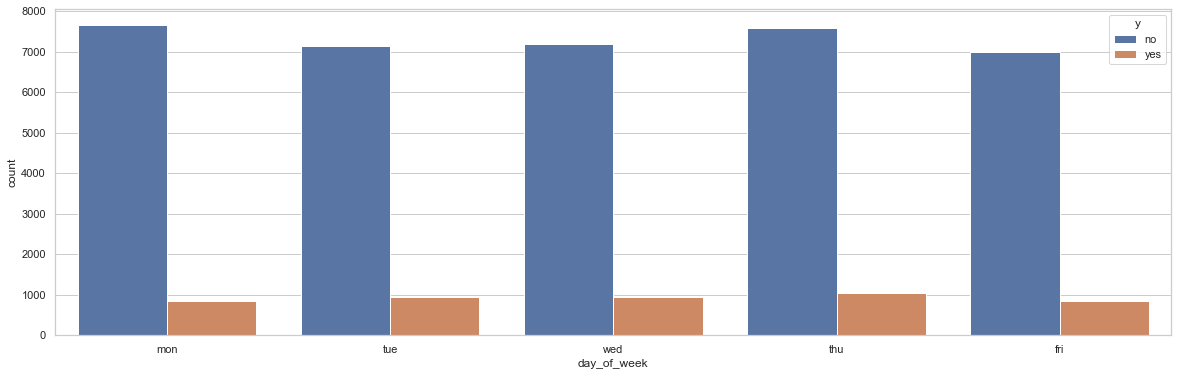

Poutcome


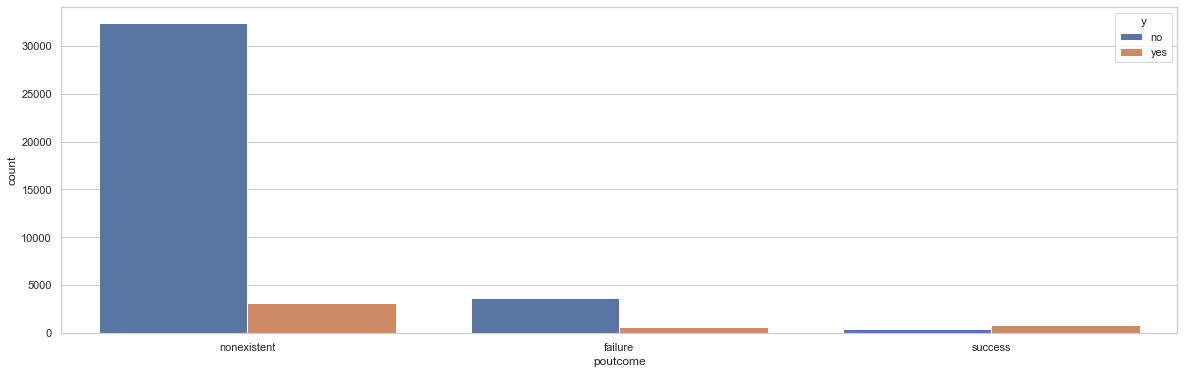

In [20]:
for column in categoricals:
    plt.figure(figsize = (20, 6))
    print(column.title())
    sns.set_theme(style="whitegrid", color_codes= True)
    ax = sns.countplot(x = df[column], hue = df['y'], data = df)
    
    plt.show()

From the plots above, we can find these insights below:

- **Job**: Among these 12 types of jobs, clients employed in these three categories: admin, blue-collar, and technician are more likely to not subscribe to a term deposit.

- **Marital**: Married clients are more likely to refuse a term deposit subscription.

- **Education**: Clients with a university degree and high school diploma are more likely to refuse a term deposit subscription.

- **Default**: Clients whose credit was not in default are more likely to refuse a term deposit subscription.

- **Loan**: Clients who don't have personal loans are less likely to accept a term deposit subscription.

- **Contact**: Clients with whom the bank has contacted in cellular are less likely to subscribe to a term deposit.

- **Month**: Clients in May have refused a term deposit most of the time.

- **Poutcome**: Clients who haven't received outcomes from previous marketing campaigns are more likely to refuse a term deposit subscription.


## 1.4 Bi-variate Analysis 
Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be Categorical & Categorical, Categorical & Continuous, and Continuous & Continuous.

### 1.4.1 Categorical & Categorical

Here we first plot a heatmap for two categorical variables. Use x = `loan`and y = `default`.

In [21]:
# Recall the categoricals we have here
print('categoricals:', categoricals)

categoricals: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


loan        no  unknown   yes
default                      
no       26838      763  4976
unknown   7097      227  1272
yes          3        0     0


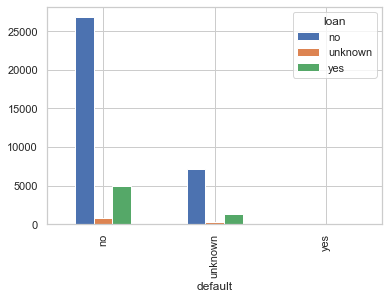

In [22]:
# Cross tabulation between the two variables
CrosstabResult = pd.crosstab(index=df['default'], columns=df['loan'])
print(CrosstabResult)

# Grouped bar chart between x and y
%matplotlib inline
CrosstabResult.plot.bar()

As expected, clients who haven't had credit in default also haven't had personal loans.

What about the distribution between `poutcome`:outcome of the previous marketing campaign and `job`?

<Figure size 1080x360 with 0 Axes>

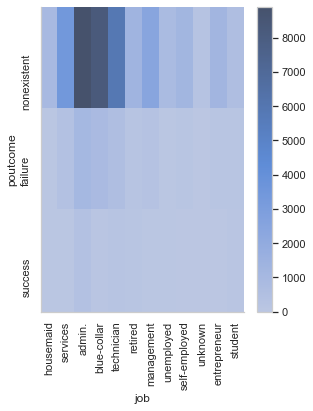

In [23]:
plt.figure(figsize=(15,5))
plot = sns.displot(data=df, x='job', y='poutcome', cbar=True)
plot.ax.tick_params(labelrotation=90)

Here the top three jobs without previous marketing campaingn outcome are *admin*, *blue-collar*, and *technician*.

Next, Let's run a **Chi-Square Test** to derive the statistical significance of relationship between the categorical variables. Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for a larger population as well. Chi-square is based on the difference between the expected and observed frequencies in one or more categories in the two-way table. It returns probability for the computed chi-square distribution with the degree of freedom.
- Probability = 0: It indicates that both categorical variable are dependent

- Probability = 1: It shows that both variables are independent.

- Probability < 0.05: It indicates that the relationship between the variables is significant at 95% confidence. 

Let's choose x = `loan`  and y = `poutcome`.

In [24]:
# Cross tabulation between contact and poutcome
CrosstabResult2=pd.crosstab(index=df['loan'], columns=df['poutcome'])
print(CrosstabResult)

# Import the required function
from scipy.stats import chi2_contingency

# Perform Chi-sq test
ChiSqResult2 = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05, then we will accep the null assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult2[1] )

loan        no  unknown   yes
default                      
no       26838      763  4976
unknown   7097      227  1272
yes          3        0     0
The P-Value of the ChiSq Test is: 0.37852017538302996


**H0**: The variables are not related with each other.

The P-Value is greater than 0.05, hence H0 will be accepted, indicating the two variables are not correlated with each other.

### 1.4.2 Categorical & Continuous 

In [25]:
# Recall numerous variabls and categorical variables
print('numericals:', numericals)
print('categoricals:', categoricals)

numericals: ['euribor3m', 'age', 'campaign', 'previous', 'pdays', 'cons.price.idx', 'cons.conf.idx']
categoricals: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [26]:
df.shape

(41176, 18)

Here we'll use a **boxen plot**, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000). It is similar to a traditional box plot, however it essentially just plots more quantiles. With more quantiles, we can see more info about the distribution shape beyond the central 50% of the data; this extra detail is especially present in the tails, where box plots tend to give limited information.

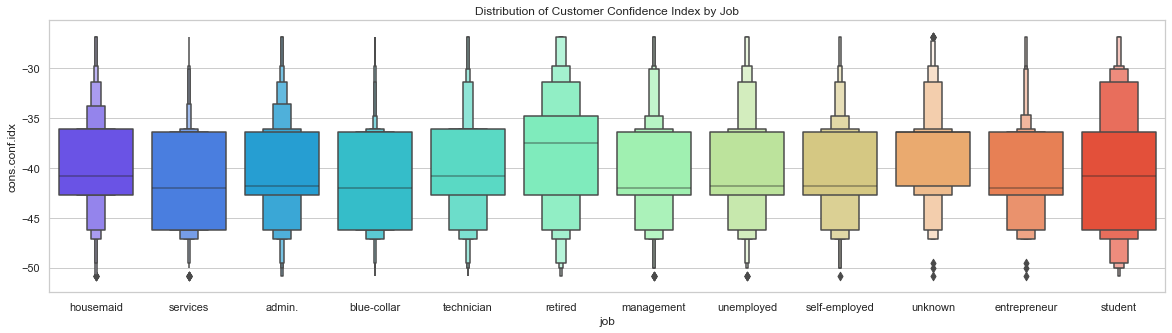

In [27]:
plt.figure(figsize=(20,5))
sns.boxenplot(x='job', y='cons.conf.idx', data = df, palette='rainbow')
plt.title('Distribution of Customer Confidence Index by Job')
plot.ax.tick_params(labelrotation=90)

From the plot above, we observe that there's greater variability in both retired clients and student clients. Comparatively, retired clients have a higher customer credit index (approximately -37), while one of the student clients is lower (-41). Overall, the general customer credit index is lower than -40. 

Before making any machine learning model on a tabular dataset, normally we check whether there is a relation between the independent and target variables.This can be done by measuring the correlation between two variables. The strength of the correlation between the variables can be measured using **ANOVA test**.

The **ANOVA test** is used to determine whether there is a significant difference among the averages of more than two groups that are statistically different from each other. This analysis is appropriate for comparing the averages of a numerical variable for more than two categories of a categorical variable.

ANOVA stands for Analysis Of Variance. So, basically this test measures if there are any significant differences between the means of the values of the numeric variable for each categorical value. 
- Null hypothesis(H0): The variables are not correlated with each other
- P-value: The probability of Null hypothesis being true
- Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
- Reject Null hypothesis if P-value<0.05. Means variables are correlated


In [28]:
# Create a new dataframe called df2
df2 = df[['cons.conf.idx', 'previous', 'campaign', 'euribor3m', 'pdays', 'cons.price.idx', 'age', 'y']].copy()
df2

,cons.conf.idx,previous,campaign,euribor3m,pdays,cons.price.idx,age,y
0,-36.4,0,1,4.857,999,93.994,56,no
1,-36.4,0,1,4.857,999,93.994,57,no
2,-36.4,0,1,4.857,999,93.994,37,no
3,-36.4,0,1,4.857,999,93.994,40,no
4,-36.4,0,1,4.857,999,93.994,56,no
...,...,...,...,...,...,...,...,...
41183,-50.8,0,1,1.028,999,94.767,73,yes
41184,-50.8,0,1,1.028,999,94.767,46,no
41185,-50.8,0,2,1.028,999,94.767,56,no
41186,-50.8,0,1,1.028,999,94.767,44,yes


In [29]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between y and other numerical independent variables
# Assumption(H0) is that y and independent variables are NOT correlated
 
# Finds out the data for each y value as a list
CategoryGroupLists1=df2.groupby('y')['cons.conf.idx'].apply(list)
CategoryGroupLists2=df2.groupby('y')['previous'].apply(list)
CategoryGroupLists3=df2.groupby('y')['campaign'].apply(list)
CategoryGroupLists4=df2.groupby('y')['euribor3m'].apply(list)
CategoryGroupLists5=df2.groupby('y')['pdays'].apply(list)
CategoryGroupLists6=df2.groupby('y')['cons.price.idx'].apply(list)
CategoryGroupLists7=df2.groupby('y')['age'].apply(list)



# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
AnovaResults1 = f_oneway(*CategoryGroupLists1)
AnovaResults2 = f_oneway(*CategoryGroupLists2)
AnovaResults3 = f_oneway(*CategoryGroupLists3)
AnovaResults4 = f_oneway(*CategoryGroupLists4)
AnovaResults5 = f_oneway(*CategoryGroupLists5)
AnovaResults6 = f_oneway(*CategoryGroupLists6)
AnovaResults7 = f_oneway(*CategoryGroupLists7)

print('P-Value for ANOVA in',numericals[1],'is: ', AnovaResults1[1])
print('P-Value for ANOVA in',numericals[2],'is: ', AnovaResults2[1])
print('P-Value for ANOVA in',numericals[5],'is: ', AnovaResults3[1])
print('P-Value for ANOVA in',numericals[3],'is: ', AnovaResults4[1])
print('P-Value for ANOVA in',numericals[0],'is: ', AnovaResults5[1])
print('P-Value for ANOVA in',numericals[6],'is: ', AnovaResults6[1])
print('P-Value for ANOVA in',numericals[4],'is: ', AnovaResults7[1])


P-Value for ANOVA in age is:  9.132175774550133e-29
P-Value for ANOVA in campaign is:  0.0
P-Value for ANOVA in cons.price.idx is:  2.0434309097339834e-41
P-Value for ANOVA in previous is:  0.0
P-Value for ANOVA in euribor3m is:  0.0
P-Value for ANOVA in cons.conf.idx is:  1.6222328681832695e-169
P-Value for ANOVA in pdays is:  7.003243845684908e-10


The P-Value obtained from ANOVA analysis for numerical variables is statistically significant(p<0.05). We conclude that they significantly affect the `y` value, i.e. whether the client has subscribed to a term deposit. Specifically, variable `campaign` and `cons.price.idx` affect clients' decisions the most. 

### 1.4.3 Continuous & Continuous

In [30]:
# Recall all continuous variables
numericals

['euribor3m',
 'age',
 'campaign',
 'previous',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx']

While doing bi-variate analysis between two continuous variables, we should look at **scatter plot**. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.

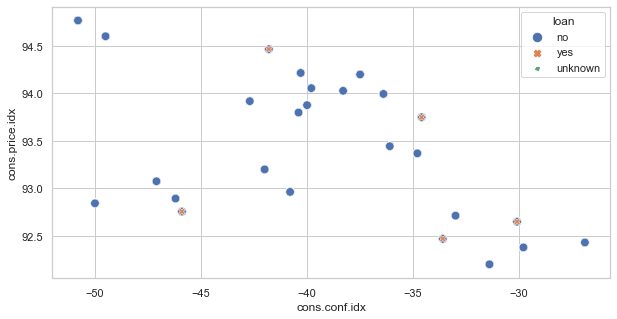

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x = 'cons.conf.idx', y ='cons.price.idx', hue = 'loan', 
                style ='loan', size = 'loan', legend = 'full', palette ='deep')

Here we see a no correlation between `cons.conf.idx` and `cons.conf.price`. 

<Figure size 2160x576 with 0 Axes>

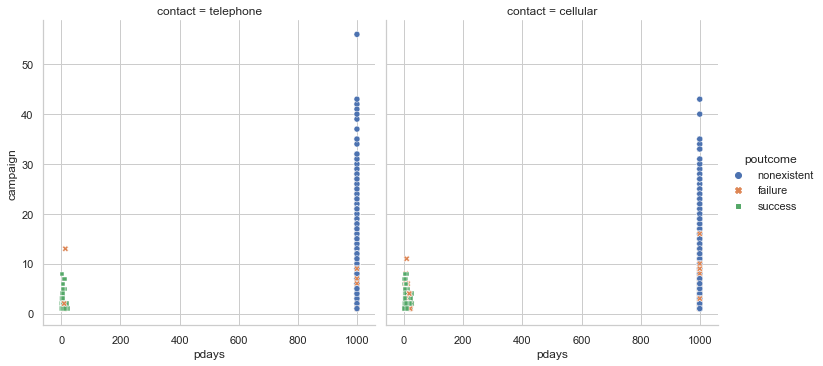

In [32]:
plt.figure(figsize = (30,8))
sns.relplot(data = df, x='pdays', y='campaign', col='contact', hue = 'poutcome', style = 'poutcome',
           kind = 'scatter')

Interestingly still, most data is concentrated around 1000 pdays, i.e., 1000 days passed after the client was last contacted from a previous campaign, no matter the contact method is telephone or cellular, the outcome of the previous marketing campaign all seemed not optimistic.

## 1.5 Outlier Treatment

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

- It increases the error variance and reduces the power of statistical tests
- If the outliers are non-randomly distributed, they can decrease normality
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set.

Before handling outliers, we will detect them. Here we'll use the IQR rule. First, we will calculate the Interquartile Range of the data (IQR = Q3 — Q1). Later, we will determine our outlier boundaries with IQR.
We will get our **lower boundary** with this calculation **Q1–1.5 * IQR**. We will get our **upper boundary** with this calculation **Q3 + 1.5 * IQR**.

According to this rule, the data between boundaries are acceptable but the data outside of the between lower and upper boundaries are outliers. We can use 2.5 or 2 to detect IQR. It depends on our data and analysis. But the most commonly used is 1.5 and we will use 1.5 IQR in this analysis.

In [33]:
# Since df2 has all the numerical variables in the dataset, we will take a look at its statistical summary specifically.
df2.describe()

,cons.conf.idx,previous,campaign,euribor3m,pdays,cons.price.idx,age
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.00000
mean,-40.502863,0.173013,2.567879,3.621293,962.464810,93.575720,40.02380
std,4.627860,0.494964,2.770318,1.734437,186.937102,0.578839,10.42068
min,-50.800000,0.000000,1.000000,0.634000,0.000000,92.201000,17.00000
25%,-42.700000,0.000000,1.000000,1.344000,999.000000,93.075000,32.00000
50%,-41.800000,0.000000,2.000000,4.857000,999.000000,93.749000,38.00000
75%,-36.400000,0.000000,3.000000,4.961000,999.000000,93.994000,47.00000
max,-26.900000,7.000000,56.000000,5.045000,999.000000,94.767000,98.00000


In [34]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
IQR

cons.conf.idx      6.300
previous           0.000
campaign           2.000
euribor3m          3.617
pdays              0.000
cons.price.idx     0.919
age               15.000
dtype: float64

In [35]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print('Lower Boundary:',lower)
print('Upper Boundary:', upper)

Lower Boundary: cons.conf.idx     -52.1500
previous            0.0000
campaign           -2.0000
euribor3m          -4.0815
pdays             999.0000
cons.price.idx     91.6965
age                 9.5000
dtype: float64
Upper Boundary: cons.conf.idx     -26.9500
previous            0.0000
campaign            6.0000
euribor3m          10.3865
pdays             999.0000
cons.price.idx     95.3725
age                69.5000
dtype: float64


Now that we've got the results from upper and lower boundaries, we are about to handle outliers outside the range which might corrupt our data.

We can easily remove outliers, but this narrows our data. If we drop the value, we delete all records (row). If we have vulnerable records, they can get lost.

Instead of removing rows arbitrarily, here we'll apply **the Winsorize Method**. 

In the Winsorize Method, we limit outliers with an upper and lower limit. We will set the limits. We will make our upper and lower limits for data our new maximum and minimum points. 

We will create a new variable with Winsorize Method. To implement the Winsorize Method, we write the exact boundary points as a tuple on the percentile. For example, we will write (0.01, 0.94). This means we want to apply quantile(0.01) and quantile(0.94) as a boundary. The first one is the exact point on percentile from the beginning, the second one is exact point on percentile from the end, which ensure the the values are within limits for outliers.

In [36]:
lower2 = df2.quantile(0.01)
upper2 = df2.quantile(0.94)
print('lower2 is:', lower2)
print('upper2 is:', upper2)

lower2 is: cons.conf.idx    -49.500
previous           0.000
campaign           1.000
euribor3m          0.658
pdays              3.000
cons.price.idx    92.201
age               23.000
Name: 0.01, dtype: float64
upper2 is: cons.conf.idx     -34.800
previous            1.000
campaign            6.000
euribor3m           4.965
pdays             999.000
cons.price.idx     94.465
age                57.000
Name: 0.94, dtype: float64


In [37]:
# Here we'll set a special range for 'age' since the previous ones didn't fit the limits.
lower_age = df2['age'].quantile(0.01)
upper_age = df2['age'].quantile(0.90)
print('lower age is:', lower_age)
print('upper age is:', upper_age)

lower age is: 23.0
upper age is: 55.0


In [38]:
from scipy.stats.mstats import winsorize
# To avoid ambiguous series result, we'll run them one by one
df2_win_conf_idx = winsorize(df2['cons.conf.idx'], (0.01, 0.06)) # 0.06 = 1.00-0.94
df2_win_pre = winsorize(df2['previous'], (0.01, 0.06))
df2_win_cam = winsorize(df2['campaign'], (0.01, 0.06))
df2_win_euri = winsorize(df2['euribor3m'], (0.01, 0.06))
df2_win_pdays = winsorize(df2['pdays'], (0.01, 0.06))
df2_win_price_idx = winsorize(df2['cons.price.idx'], (0.01, 0.06))
df2_win_age = winsorize(df2['age'], (0.01, 0.10)) #0.10 = 1.00-0.90

print(df2_win_conf_idx)
print(df2_win_pre)
print(df2_win_cam)
print(df2_win_euri)
print(df2_win_pdays)
print(df2_win_price_idx)
print(df2_win_age)

[-36.4 -36.4 -36.4 ... -49.5 -49.5 -49.5]
[0 0 0 ... 0 0 1]
[1 1 1 ... 2 1 3]
[4.857 4.857 4.857 ... 1.028 1.028 1.028]
[999 999 999 ... 999 999 999]
[93.994 93.994 93.994 ... 94.465 94.465 94.465]
[55 55 37 ... 55 44 55]


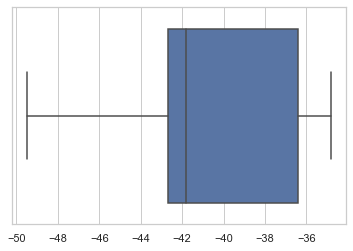

In [39]:
# One quick look on customer confidenx index, clearly there's no outlier now.
sns.boxplot(df2_win_conf_idx)

In [40]:
# Merge these series into one dataframe 'df3_outlier'
conf_idx_series = pd.Series(df2_win_conf_idx, name = 'cons.conf.idx')
pre_series = pd.Series(df2_win_pre, name = 'previous')
cam_series = pd.Series(df2_win_cam, name = 'campaign')
euri_series = pd.Series(df2_win_euri, name = 'euribor3m')
pdays_series = pd.Series(df2_win_pdays, name = 'pdays')
price_idx_series = pd.Series(df2_win_price_idx, name = 'cons.price.idx')
age_series = pd.Series(df2_win_age, name = 'age')

df3_outlier = pd.concat([conf_idx_series, pre_series, cam_series, euri_series, pdays_series,
                        price_idx_series, age_series], axis = 1)
df3_outlier

,cons.conf.idx,previous,campaign,euribor3m,pdays,cons.price.idx,age
0,-36.4,0,1,4.857,999,93.994,55
1,-36.4,0,1,4.857,999,93.994,55
2,-36.4,0,1,4.857,999,93.994,37
3,-36.4,0,1,4.857,999,93.994,40
4,-36.4,0,1,4.857,999,93.994,55
...,...,...,...,...,...,...,...
41171,-49.5,0,1,1.028,999,94.465,55
41172,-49.5,0,1,1.028,999,94.465,46
41173,-49.5,0,2,1.028,999,94.465,55
41174,-49.5,0,1,1.028,999,94.465,44


In [41]:
# Drop the original columns in dataframe in df
df4 = df.drop(df.columns[[0, 10, 11, 12, 14, 15, 16]], axis=1)  
df4

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [42]:
# Merge the two dataframes to update outlier values with processed ones
merged_df = df4.merge(df3_outlier, left_index=True, right_index=True)
merged_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,cons.conf.idx,previous,campaign,euribor3m,pdays,cons.price.idx,age
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no,-36.4,0,1,4.857,999,93.994,55
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,-36.4,0,1,4.857,999,93.994,55
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,-36.4,0,1,4.857,999,93.994,37
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no,-36.4,0,1,4.857,999,93.994,40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,-36.4,0,1,4.857,999,93.994,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,student,married,professional.course,no,yes,no,telephone,nov,thu,nonexistent,yes,-49.5,0,1,1.028,999,94.465,55
41172,admin.,single,university.degree,no,yes,no,cellular,nov,thu,nonexistent,yes,-49.5,0,1,1.028,999,94.465,46
41173,retired,married,university.degree,no,yes,no,cellular,nov,thu,failure,yes,-49.5,0,2,1.028,999,94.465,55
41174,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,yes,-49.5,0,1,1.028,999,94.465,44


In [43]:
# Reorder the columns to make it easier for further analysis
column_names = ['age', 'job', 'marital', 'education', 'default',
               'housing', 'loan', 'contact', 'month', 'day_of_week',
               'poutcome', 'cons.conf.idx', 'previous', 'campaign',
               'euribor3m', 'pdays', 'cons.price.idx', 'y']
merged_df = merged_df.reindex(columns = column_names)
merged_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,cons.conf.idx,previous,campaign,euribor3m,pdays,cons.price.idx,y
0,55,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,-36.4,0,1,4.857,999,93.994,no
1,55,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,-36.4,0,1,4.857,999,93.994,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,-36.4,0,1,4.857,999,93.994,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,-36.4,0,1,4.857,999,93.994,no
4,55,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,-36.4,0,1,4.857,999,93.994,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,55,student,married,professional.course,no,yes,no,telephone,nov,thu,nonexistent,-49.5,0,1,1.028,999,94.465,yes
41172,46,admin.,single,university.degree,no,yes,no,cellular,nov,thu,nonexistent,-49.5,0,1,1.028,999,94.465,yes
41173,55,retired,married,university.degree,no,yes,no,cellular,nov,thu,failure,-49.5,0,2,1.028,999,94.465,yes
41174,44,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,-49.5,0,1,1.028,999,94.465,yes


## 1.6 Feature Engineering

Once we have completed the first 5 steps in data exploration - **Variable Identification, Univariate Analysis, Bivariate Analysis, Missing Values Treatment, and Outliers Treatment** , we can proceed with **Feature Engineering**. 

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Since we're going to perform different machine learning methods, first we'll encode categorical variables in this section, and then do feature scaling in each part later. 

In [44]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
merged_df = pd.get_dummies(merged_df, prefix = ['job'], columns = ['job'])
merged_df = pd.get_dummies(merged_df, prefix = ['marital'], columns = ['marital'])
merged_df = pd.get_dummies(merged_df, prefix = ['education'], columns = ['education'])
merged_df = pd.get_dummies(merged_df, prefix = ['default'], columns = ['default'])
merged_df = pd.get_dummies(merged_df, prefix = ['housing'], columns = ['housing'])
merged_df = pd.get_dummies(merged_df, prefix = ['loan'], columns = ['loan'])
merged_df = pd.get_dummies(merged_df, prefix = ['contact'], columns = ['contact'])
merged_df = pd.get_dummies(merged_df, prefix = ['month'], columns = ['month'])
merged_df = pd.get_dummies(merged_df, prefix = ['day_of_week'], columns = ['day_of_week'])
merged_df = pd.get_dummies(merged_df, prefix = ['poutcome'], columns = ['poutcome'])

In [45]:
merged_df

,age,cons.conf.idx,previous,campaign,euribor3m,pdays,cons.price.idx,y,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,55,-36.4,0,1,4.857,999,93.994,no,0,0,...,0,0,0,1,0,0,0,0,1,0
1,55,-36.4,0,1,4.857,999,93.994,no,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,-36.4,0,1,4.857,999,93.994,no,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,-36.4,0,1,4.857,999,93.994,no,1,0,...,0,0,0,1,0,0,0,0,1,0
4,55,-36.4,0,1,4.857,999,93.994,no,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,55,-49.5,0,1,1.028,999,94.465,yes,0,0,...,0,0,0,0,1,0,0,0,1,0
41172,46,-49.5,0,1,1.028,999,94.465,yes,1,0,...,0,0,0,0,1,0,0,0,1,0
41173,55,-49.5,0,2,1.028,999,94.465,yes,0,0,...,0,0,0,0,1,0,0,1,0,0
41174,44,-49.5,0,1,1.028,999,94.465,yes,0,0,...,0,0,0,0,1,0,0,0,0,1


# 2. Modeling

## 2.1 Machine Learning

### 2.1.1 Logistic Regression

In [46]:
# Take a look at our new dataframe first
merged_df.head()

,age,cons.conf.idx,previous,campaign,euribor3m,pdays,cons.price.idx,y,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,55,-36.4,0,1,4.857,999,93.994,no,0,0,...,0,0,0,1,0,0,0,0,1,0
1,55,-36.4,0,1,4.857,999,93.994,no,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,-36.4,0,1,4.857,999,93.994,no,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,-36.4,0,1,4.857,999,93.994,no,1,0,...,0,0,0,1,0,0,0,0,1,0
4,55,-36.4,0,1,4.857,999,93.994,no,0,0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
merged_df.shape

(41164, 61)

In [48]:
# Prepare y dataset
y = merged_df.iloc[:,7]
y

0         no
1         no
2         no
3         no
4         no
        ... 
41171    yes
41172    yes
41173    yes
41174    yes
41175     no
Name: y, Length: 41164, dtype: object

In [49]:
# Prepare X dataset
X1 = merged_df.iloc[:,0:7]
X2 = merged_df.iloc[:,8:62]
X = pd.merge(X1, X2, left_index = True, right_index = True)
X

,age,cons.conf.idx,previous,campaign,euribor3m,pdays,cons.price.idx,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,55,-36.4,0,1,4.857,999,93.994,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,55,-36.4,0,1,4.857,999,93.994,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,-36.4,0,1,4.857,999,93.994,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,-36.4,0,1,4.857,999,93.994,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,55,-36.4,0,1,4.857,999,93.994,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,55,-49.5,0,1,1.028,999,94.465,0,0,0,...,0,0,0,0,1,0,0,0,1,0
41172,46,-49.5,0,1,1.028,999,94.465,1,0,0,...,0,0,0,0,1,0,0,0,1,0
41173,55,-49.5,0,2,1.028,999,94.465,0,0,0,...,0,0,0,0,1,0,0,1,0,0
41174,44,-49.5,0,1,1.028,999,94.465,0,0,0,...,0,0,0,0,1,0,0,0,0,1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

Text(0.5, 1, 'Accuracy Score:0.9032164026819551')

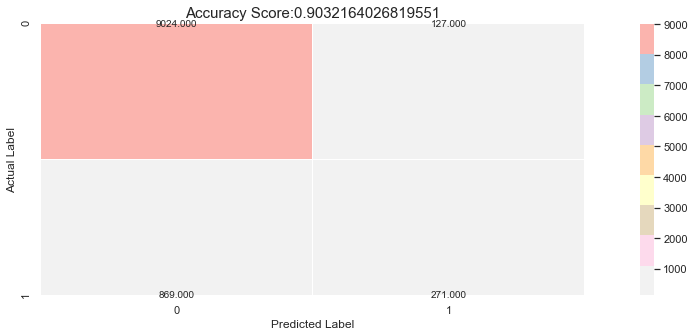

In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
cm

# Use score method to get accuracy of model
score = classifier.score(X_test, y_test)
score

# Let's produce a more visually readable confusion matrix using seaborn
plt.figure(figsize = (20,5))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidth = .5, square = True,
           cmap = 'Pastel1_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(score)
plt.title(all_sample_title, size = 15)

The accuracy for this Logistic Regression model is around 90%.

Since Logistic Regression handles mainly linear problems, let's try non-linear models to test if they can improve the accuracy.

### 2.1.2 K-Nearest Neighbor (KNN)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://num

Text(0.5, 1, 'Accuracy Score:0.8914585560198232')

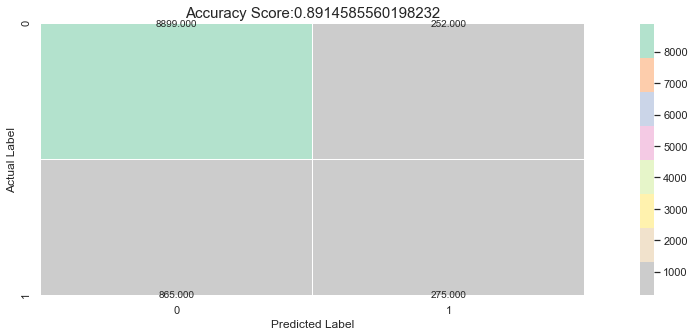

In [51]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling - make all variables within the same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = sc_X.fit_transform(X_train2) # Only training set needs to use fit_transform()
X_test2 = sc_X.transform(X_test2) # test set only needs transform() 

# Fit the Classifier to the Traning set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2 )
classifier.fit(X_train2, y_train2)

# Predict the Test set results
y_pred2 = classifier.predict(X_test2)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix #import a function
cm2 = confusion_matrix(y_test2, y_pred2) #Compare y_pred with y_test

# Use score method to get accuracy of model
score2 = classifier.score(X_test2, y_test2)

# Visualize the model accuracy
plt.figure(figsize = (20,5))
sns.heatmap(cm2, annot = True, fmt = '.3f', linewidth = .5, square = True,
           cmap = 'Pastel2_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(score2)
plt.title(all_sample_title, size = 15)

The accuracy for this KNN model is around 89%, which is less then the previous logistic regression one. Let's try something else. 

### 2.1.3 Kernel SVM

Text(0.5, 1, 'Accuracy Score:0.9012729569526771')

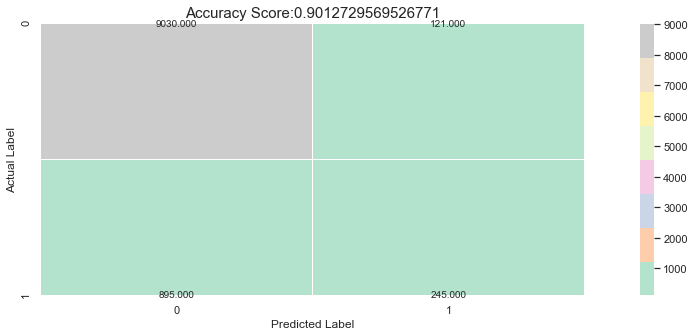

In [52]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling - make all variables within the same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train3 = sc_X.fit_transform(X_train3) # Only training set needs to use fit_transform()
X_test3 = sc_X.transform(X_test3) # test set only needs transform() 

# Fit the Classifier to the Traning set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train3, y_train3)

# Predict the Test set results
y_pred3 = classifier.predict(X_test3)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix #import a function
cm3 = confusion_matrix(y_test3, y_pred3) #Compare y_pred with y_test

# Use score method to get accuracy of model
score3 = classifier.score(X_test3, y_test3)

# Visualize the model accuracy
plt.figure(figsize = (20,5))
sns.heatmap(cm3, annot = True, fmt = '.3f', linewidth = .5, square = True,
           cmap = 'Pastel2')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(score3)
plt.title(all_sample_title, size = 15)

The accuracy for this Kernel SVM model is around 90%.

### 2.1.4 Decision Tree

/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


Text(0.5, 1, 'Accuracy Score:0.8394713827616364')

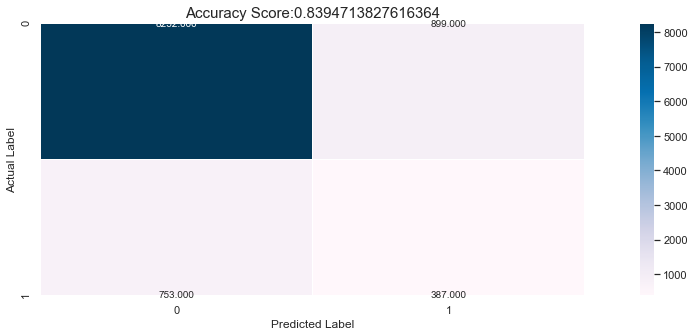

In [53]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling - make all variables within the same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train4 = sc_X.fit_transform(X_train4) # Only training set needs to use fit_transform()
X_test4 = sc_X.transform(X_test4) # test set only needs transform() 

# Fit the Classifier to the Traning set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                    random_state = 0)
classifier.fit(X_train4, y_train4)

# Predict the Test set results
y_pred4 = classifier.predict(X_test4)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix #import a function
cm4 = confusion_matrix(y_test4, y_pred4) #Compare y_pred with y_test

# Use score method to get accuracy of model
score4 = classifier.score(X_test4, y_test4)

# Visualize the model accuracy
plt.figure(figsize = (20,5))
sns.heatmap(cm4, annot = True, fmt = '.3f', linewidth = .5, square = True,
           cmap = 'PuBu')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(score4)
plt.title(all_sample_title, size = 15)

The accuracy for this Decision Tree model is around 84%.

### 2.1.5 Random Forest

In [54]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling - make all variables within the same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train5 = sc_X.fit_transform(X_train5) # Only training set needs to use fit_transform()
X_test5 = sc_X.transform(X_test5) # test set only needs transform() 

# Fit the Classifier to the Traning set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,
                                    criterion = 'entropy',
                                    random_state = 0)
classifier.fit(X_train5, y_train5)

# Predict the Test set results
y_pred5 = classifier.predict(X_test5)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix #import a function
cm5 = confusion_matrix(y_test5, y_pred5) #Compare y_pred with y_test

# Use score method to get accuracy of model
score5 = classifier.score(X_test5, y_test5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_s

Text(0.5, 1, 'Accuracy Score:0.8934020017491011')

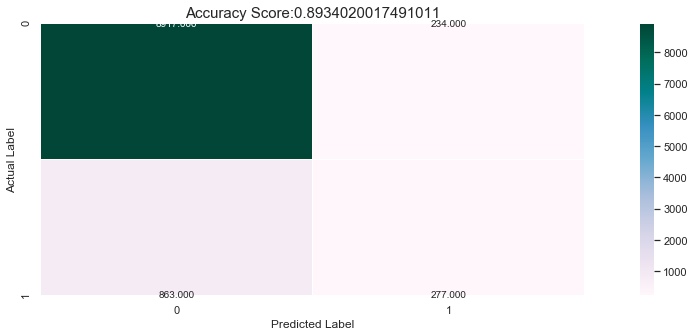

In [55]:
# Visualize the model accuracy
plt.figure(figsize = (20,5))
sns.heatmap(cm5, annot = True, fmt = '.3f', linewidth = .5, square = True,
           cmap = 'PuBuGn')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(score5)
plt.title(all_sample_title, size = 15)

The accuracy for this Random Forest model is around 89%.

### 2.1.6 Naive Bayes

In [56]:
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling - make all variables within the same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train6 = sc_X.fit_transform(X_train6) # Only training set needs to use fit_transform()
X_test6 = sc_X.transform(X_test6) # test set only needs transform() 

# Fit the Classifier to the Traning set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train6, y_train6)

# Predict the Test set results
y_pred6 = classifier.predict(X_test6)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix #import a function
cm6 = confusion_matrix(y_test6, y_pred6) #Compare y_pred with y_test

# Use score method to get accuracy of model
score6 = classifier.score(X_test6, y_test6)


Text(0.5, 1, 'Accuracy Score:0.6177242250510154')

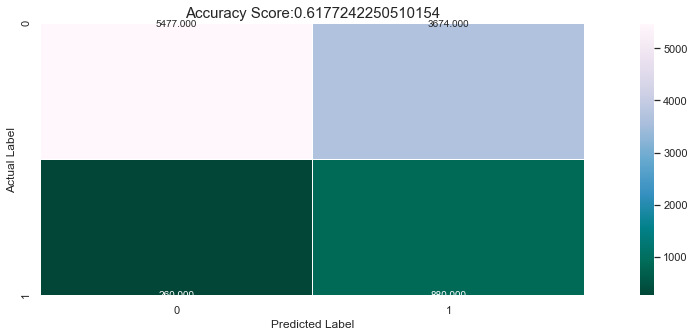

In [57]:
# Visualize the model accuracy
plt.figure(figsize = (20,5))
sns.heatmap(cm6, annot = True, fmt = '.3f', linewidth = .5, square = True,
           cmap = 'PuBuGn_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(score6)
plt.title(all_sample_title, size = 15)

The accuracy for this Naive Bayes model is around 62%, which is the least one we've ever generated so far.

## 3. Dimensionality Reduction

### 2.3.1 PCA

From the m independent variables of your dataset, PCA extracts p <= m new independent variables that explain the most the variance of the dataset, regardless of the dependent variable. The fact that the DV is not considered makes PCA an unsupervised model.

In [58]:
# Splitting the Dataset into the Training set and Test set
"""training set is for tools to do the machine learning,
   while test set is for tools to predict based on the learning results from training set"""
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling - make all variables within the same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train7 = sc_X.fit_transform(X_train7) # Only training set needs to use fit_transform()
X_test7 = sc_X.transform(X_test7) # test set only needs transform()
"""Since PCA is an unsupervised model, we don't need to include y_train here"""

# Applying PCA (Dimensionality Reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
"""
'5' since we only select the top two principle components as our independent variables in the most related-variance"""
X_train7 = pca.fit_transform(X_train7)
X_test7 = pca.transform(X_test7)
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.07550575, 0.04414717, 0.03896844, 0.03825114, 0.03444637])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

Text(0.5, 1, 'Accuracy Score:0.8916555326126564')

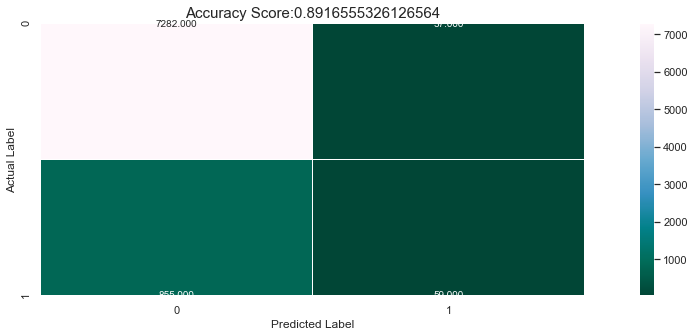

In [59]:
# Fitting Logistic Regression to the Traning set

from sklearn.linear_model import LogisticRegression #import a class
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train7, y_train7)

# Predict the Test set results
y_pred7 = classifier.predict(X_test7)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix #import a function
cm7 = confusion_matrix(y_test7, y_pred7) #Compare y_pred with y_test
cm7

# Use score method to get accuracy of model
score7 = classifier.score(X_test7, y_test7)

plt.figure(figsize = (20,5))
sns.heatmap(cm7, annot = True, fmt = '.3f', linewidth = .5, square = True,
           cmap = 'PuBuGn_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(score7)
plt.title(all_sample_title, size = 15)

### 2.3.2 LDA

In [60]:
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling - make all variables within the same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train8 = sc_X.fit_transform(X_train8) # Only training set needs to use fit_transform()
X_test8 = sc_X.transform(X_test8) # test set only needs transform() 

# Applying LDA (Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 5)
X_train8 = lda.fit_transform(X_train8, y_train8) # since LDA is a supervised model, we need to include y here
X_test8 = lda.transform(X_test8) 

# Fitting Logistic Regression to the Traning set

from sklearn.linear_model import LogisticRegression #import a class
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train8, y_train8)

# Predicting the Test set results
y_pred8 = classifier.predict(X_test8)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix #import a function
cm8 = confusion_matrix(y_test8, y_pred8) #Compare y_pred with y_test

# Use score method to get accuracy of model
score8 = classifier.score(X_test8, y_test8)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

Text(0.5, 1, 'Accuracy Score:0.902222762055144')

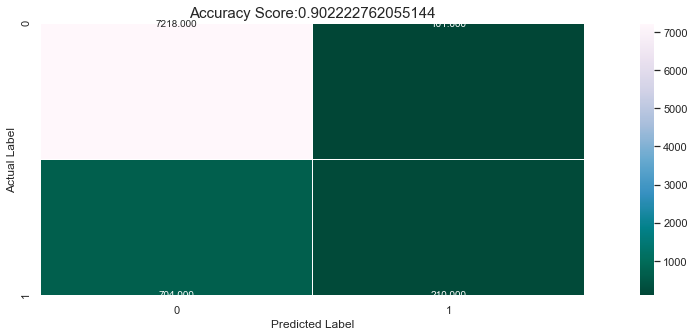

In [61]:
plt.figure(figsize = (20,5))
sns.heatmap(cm8, annot = True, fmt = '.3f', linewidth = .5, square = True,
           cmap = 'PuBuGn_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score:{0}'.format(score8)
plt.title(all_sample_title, size = 15)

By applying the LDA method to our previous Logidtic Regression model, we kept the model accuracy at around 90%.

# Conclusion

- The more a client was previously contacted, the higher the chance of selling a term deposit.
- When 1000 days have passed after the client was last contacted from a previous campaign, no matter the contact method is telephone or cellular, the outcome of the previous marketing campaign all seemed not optimistic. 
- Specifically, the number of contacts performed during this campaign and for this client and consumer price index affect clients' decisions the most. We should contact clients with more follow-ups while looking for those with higher monthly price index indicators.
- Among all the models we've tested in this case, Logistic Regression model has the highest accurancy. 